<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 169.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 184.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 156.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 150.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 168.3 MB/s eta 0:00:00


## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [2]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [4]:
# Write your code here

print(df.shape)

print("---")
print(df.info())

print("----")

print(df.isnull().sum())

print("----")

print(df["JobSat"].isnull().sum())

(65437, 114)
---
<class 'pandas.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), str(100)
memory usage: 56.9 MB
None
----
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64
----
36311


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [5]:
# Write your code here

print(df.describe())


         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.000000         0.00000   
25%          0.000000 

### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [8]:
# Write your code here

print(df["Country"].head(20))             #Getting an overview
print("--------")
print(df["Country"].isnull().sum())       # How many empty rows?  
print("--------")
print(df["Country"].unique())             #See all unique values in Country
print("--------")
print(df["Country"].nunique())           #Count how many unique values there are
print("--------")
print(df["Country"].value_counts())      #See value counts to spot inconsistencies
print("--------")
print(df["Country"].value_counts().tail(20)) #Check for suspicious entries


0                              United States of America
1     United Kingdom of Great Britain and Northern I...
2     United Kingdom of Great Britain and Northern I...
3                                                Canada
4                                                Norway
5                              United States of America
6                              United States of America
7                                            Uzbekistan
8     United Kingdom of Great Britain and Northern I...
9                                                Serbia
10                             United States of America
11                                               Poland
12                             United States of America
13                                          Philippines
14                                             Bulgaria
15                                          Switzerland
16                                               Canada
17                                              

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [13]:
## Write your code here
print(df["EdLevel"].unique())

print(df["Country"].unique())

#In this cases not necessary

<StringArray>
[                                                         'Primary/elementary school',
                                       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
                                    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
                             'Some college/university study without earning a degree',
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
                                     'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
                                                'Associate degree (A.A., A.S., etc.)',
                                                                     'Something else',
                                                                                  nan]
Length: 9, dtype: str
<StringArray>
[                            'United States of America',
 'United Kingdom of Great Britain and Northern Ireland',
                                               'Canad

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [14]:
## Write your code here

employment_encoded = pd.get_dummies(df["Employment"], prefix="Employment") #One-hot encode the Employment column
df = pd.concat([df, employment_encoded], axis=1)                          #Adding the new columns to the dataframe /axis=1 means add as new columns, not new rows.
print(employment_encoded.head())


   Employment_Employed, full-time  \
0                            True   
1                            True   
2                            True   
3                           False   
4                           False   

   Employment_Employed, full-time;Employed, part-time  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

   Employment_Employed, full-time;Independent contractor, freelancer, or self-employed  \
0                                              False                                     
1                                              False                                     
2                                              False                                     
3                                              False                      

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [17]:
## Write your code here
#Count missing values and sort by highest
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
YearsCode                      5568
NEWSOSites                     5151
LearnCode                      4949
EdLevel                        4653
AISelect                       4530
Length: 109, dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [18]:
## Write your code here

mean1 = df["ConvertedCompYearly"].mean()

df["ConvertedCompYearly"] = df["ConvertedCompYearly"].fillna(mean1)

print(df["ConvertedCompYearly"].isnull().sum())


0


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [22]:
## Write your code here

fv = df["RemoteWork"].mode()[0]

df["RemoteWork"] = df["RemoteWork"].fillna(fv)

print(df["RemoteWork"].isnull().sum())

#For all columns:
cat_cols = df.select_dtypes(include="object").columns
missing_cat = df[cat_cols].isnull().sum()
missing_cat = missing_cat[missing_cat > 0]

for col in missing_cat.index:
    most_frequent = df[col].mode()[0]
    df[col] = df[col].fillna(most_frequent)
    print(f"{col} filled with: {most_frequent}")


0


/tmp/ipykernel_299/453915084.py:10: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include="object").columns


CodingActivities filled with: Hobby
EdLevel filled with: Bachelor’s degree (B.A., B.S., B.Eng., etc.)
LearnCode filled with: Other online resources (e.g., videos, blogs, forum, online community)
LearnCodeOnline filled with: Technical documentation;Blogs;Written Tutorials;Stack Overflow
TechDoc filled with: API document(s) and/or SDK document(s);User guides or README files found in the source repository;Traditional public search engine
YearsCode filled with: 10
YearsCodePro filled with: 2
DevType filled with: Developer, full-stack
OrgSize filled with: 20 to 99 employees
PurchaseInfluence filled with: I have some influence
BuyNewTool filled with: Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow
BuildvsBuy filled with: Is ready-to-go but also customizable for growth and targeted use cases
TechEndorse filled with: APIs;Customization;Reputation for quality and excellence
Country filled with: United States of America
Currency filled with: EUR

### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [24]:
## Write your code here

min_val = df["ConvertedCompYearly"].min()
max_val = df["ConvertedCompYearly"].max()

df["ConvertedCompYearly_nor"] = (df["ConvertedCompYearly"] - min_val) / (max_val -min_val)

print(df[["ConvertedCompYearly", "ConvertedCompYearly_nor"]].head(5))


   ConvertedCompYearly  ConvertedCompYearly_nor
0         86155.287263                   0.0053
1         86155.287263                   0.0053
2         86155.287263                   0.0053
3         86155.287263                   0.0053
4         86155.287263                   0.0053


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


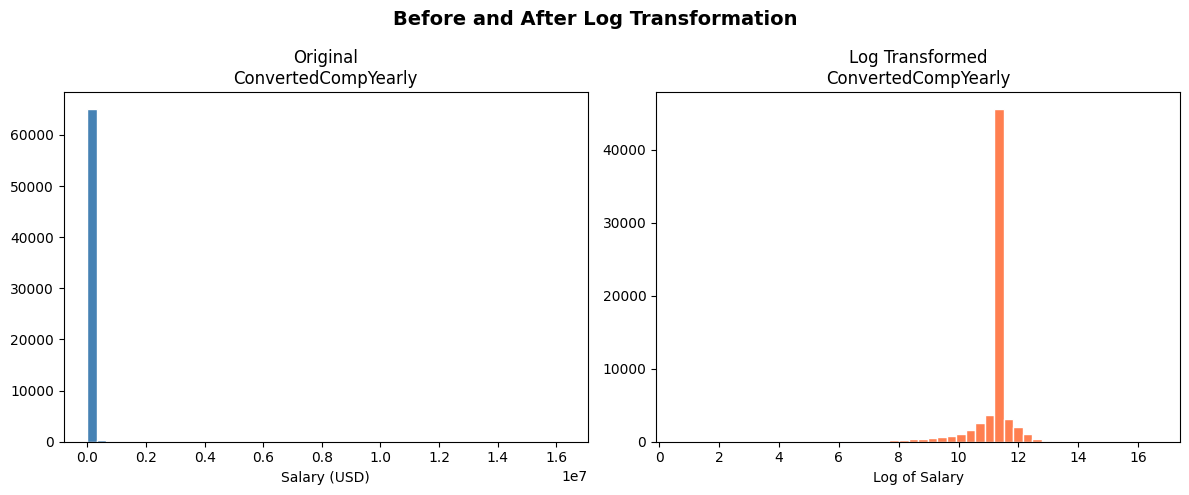

In [27]:
## Write your code here
import numpy as np
import matplotlib.pyplot as plt
# Log transform
df["ConvertedCompYearly_log"] = np.log1p(df["ConvertedCompYearly"])

#Compare before and after

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(df["ConvertedCompYearly"].dropna(), bins=50, color="steelblue", edgecolor="white")
axes[0].set_title("Original\nConvertedCompYearly")
axes[0].set_xlabel("Salary (USD)")

axes[1].hist(df["ConvertedCompYearly_log"].dropna(), bins=50, color="coral", edgecolor="white")
axes[1].set_title("Log Transformed\nConvertedCompYearly")
axes[1].set_xlabel("Log of Salary")

plt.suptitle("Before and After Log Transformation", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [29]:
## Write your code here

print(df["YearsCodePro"].unique())

#Create numbers
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

#Create column
conditions = [
    df["YearsCodePro"] <= 2,
    df["YearsCodePro"] <= 5,
    df["YearsCodePro"] <= 10,
    df["YearsCodePro"] > 10
]
labels = ["Junior", "Mid-level", "Senior", "Expert"]

df["ExperienceLevel"] = np.select(conditions, labels, default="Unknown")


print(df["ExperienceLevel"].value_counts())


<StringArray>
[                 '2',                 '17',                 '27',
                  '7',                 '11',                 '25',
                 '12',                 '10',                  '3',
   'Less than 1 year',                 '18',                 '37',
                 '15',                 '20',                  '6',
                 '16',                  '8',                 '14',
                  '4',                 '45',                  '1',
                 '24',                 '29',                  '5',
                 '30',                 '26',                  '9',
                 '33',                 '13',                 '35',
                 '23',                 '22',                 '31',
                 '19',                 '21',                 '28',
                 '34',                 '32',                 '40',
                 '50',                 '39',                 '44',
                 '42',                 '41',    

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
